In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Path to bbox_files
bbox_dir = '/kaggle/input/cleaned-cv-dataset/bboxes_files'

In [2]:
# Initialize counter for label IDs
label_counter = Counter()

In [3]:
# Process each CSV file
for filename in os.listdir(bbox_dir):
    if filename.endswith('.csv'):
        filepath = os.path.join(bbox_dir, filename)
        df = pd.read_csv(filepath, header=None)  # no column names
        labels = df.iloc[:, 4].tolist()  # column at index 5
        label_counter.update(labels)

In [5]:
class_name_map = {
    0: "CROP",
    1: "GRASSES",
    2: "AMARNATH",
    3: "GOOSEFOOT",
    4: "KNOTWEED",
    5: "CORN SPURRY",
    6: "CHICKWEED",
    7: "SOLANALES",
    8: "POTATO WEED",
    9: "CHAMOMILE",
    10: "THISTLE",
    11: "MERCURIES",
    12: "GERMANIUM",
    13: "CRUCIFER",
    14: "POPPY",
    15: "PLANTAGO",
    16: "LABIATE"
}

In [6]:
named_counter = {class_name_map.get(k, f"Unknown({k})"): v for k, v in label_counter.items()}


In [ ]:
# Convert to pandas DataFrame for plotting
label_df = pd.DataFrame.from_dict(named_counter, orient='index', columns=['Count'])
label_df.index.name = 'Class Name'
label_df = label_df.sort_index()

In [11]:
label_df

Count
Class Name        
AMARNATH      3484
CHAMOMILE     2721
CHICKWEED      219
CORN SPURRY    922
CROP         20765
CRUCIFER      1855
GERMANIUM     5095
GOOSEFOOT     3510
GRASSES      20425
KNOTWEED      3032
LABIATE        650
MERCURIES     1147
PLANTAGO      1300
POPPY          882
POTATO WEED   2563
SOLANALES     1016
THISTLE       8702

In [14]:
class_counts_full = label_df["Count"].to_dict()

In [15]:
class_counts_full

{'AMARNATH': 3484,
 'CHAMOMILE': 2721,
 'CHICKWEED': 219,
 'CORN SPURRY': 922,
 'CROP': 20765,
 'CRUCIFER': 1855,
 'GERMANIUM': 5095,
 'GOOSEFOOT': 3510,
 'GRASSES': 20425,
 'KNOTWEED': 3032,
 'LABIATE': 650,
 'MERCURIES': 1147,
 'PLANTAGO': 1300,
 'POPPY': 882,
 'POTATO WEED': 2563,
 'SOLANALES': 1016,
 'THISTLE': 8702}

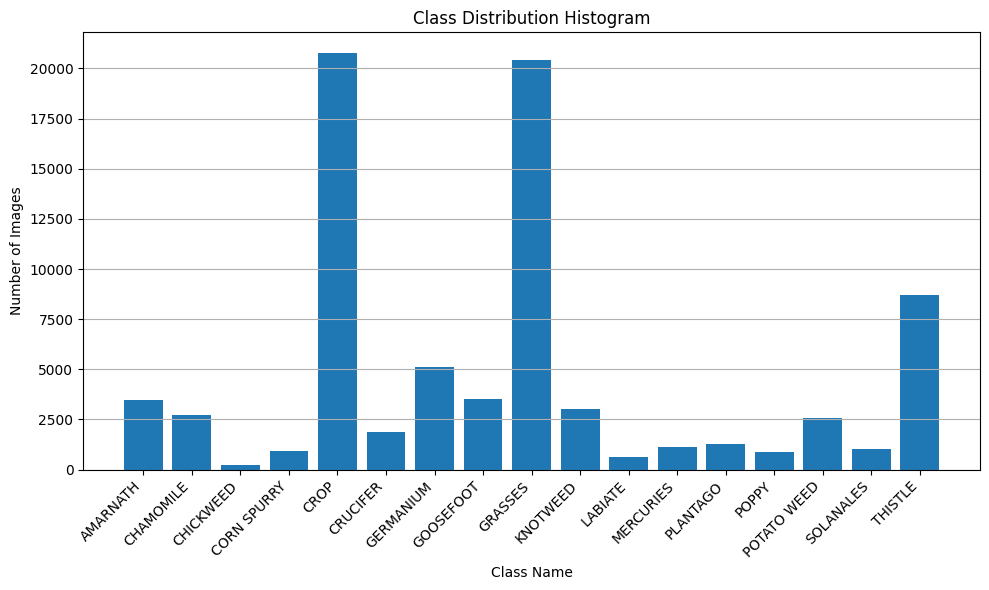

In [16]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(class_counts_full.keys(), class_counts_full.values())
plt.title("Class Distribution Histogram")
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

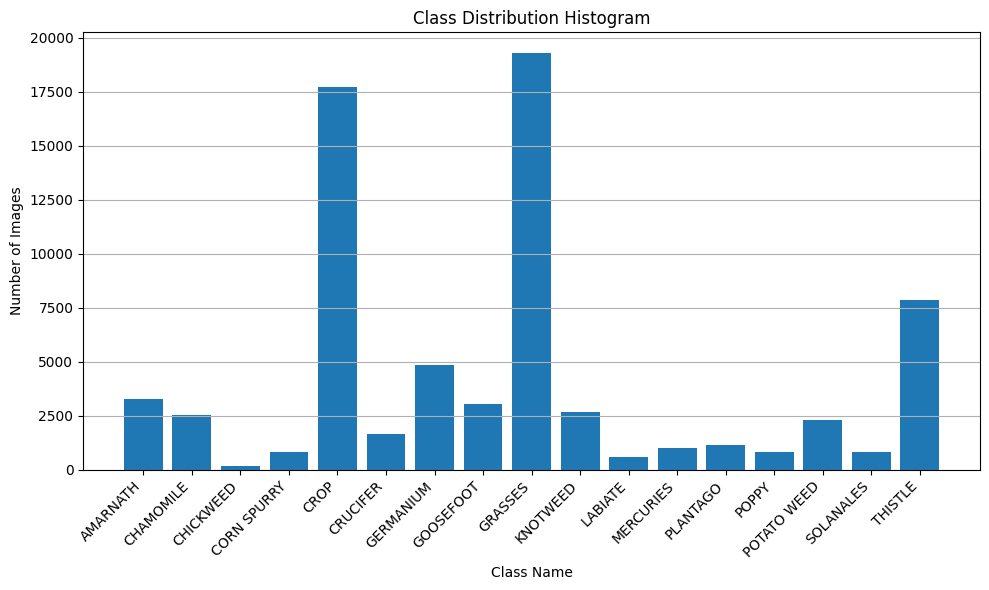

In [10]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Root directory containing class folders
dataset_dir = '/kaggle/input/cnw-patches/kaggle/working/CropAndWeedsPatches'

# Count number of images in each class folder
class_counts = {}

for class_id in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_id)
    if os.path.isdir(class_path):
        class_name = class_name_map.get(int(class_id), f"Unknown({class_id})")
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[class_name] = num_images

# Sort by class name
class_counts = dict(sorted(class_counts.items()))

# Plot
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution Histogram")
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [19]:
class_counts

{'AMARNATH': 3284,
 'CHAMOMILE': 2536,
 'CHICKWEED': 186,
 'CORN SPURRY': 830,
 'CROP': 17709,
 'CRUCIFER': 1649,
 'GERMANIUM': 4838,
 'GOOSEFOOT': 3052,
 'GRASSES': 19281,
 'KNOTWEED': 2682,
 'LABIATE': 593,
 'MERCURIES': 995,
 'PLANTAGO': 1149,
 'POPPY': 807,
 'POTATO WEED': 2317,
 'SOLANALES': 819,
 'THISTLE': 7856}

In [20]:
class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))
class_counts

{'GRASSES': 19281,
 'CROP': 17709,
 'THISTLE': 7856,
 'GERMANIUM': 4838,
 'AMARNATH': 3284,
 'GOOSEFOOT': 3052,
 'KNOTWEED': 2682,
 'CHAMOMILE': 2536,
 'POTATO WEED': 2317,
 'CRUCIFER': 1649,
 'PLANTAGO': 1149,
 'MERCURIES': 995,
 'CORN SPURRY': 830,
 'SOLANALES': 819,
 'POPPY': 807,
 'LABIATE': 593,
 'CHICKWEED': 186}

In [ ]:
{'GRASSES': 0,
 'CROP': 0,
 'THISTLE': 0,
 'GERMANIUM': 1,
 'AMARNATH': 2,
 'GOOSEFOOT': 2,
 'KNOTWEED': 2,
 'CHAMOMILE': 2,
 'POTATO WEED': 3,
 'CRUCIFER': 4,
 'PLANTAGO': 5,
 'MERCURIES': 5,
 'CORN SPURRY': 5,
 'SOLANALES': 5,
 'POPPY': 5,
 'LABIATE': 6,
 'CHICKWEED': 8}

In [26]:
import os
import random
import shutil
from glob import glob
from tqdm.auto import tqdm
import albumentations as A
import cv2

In [31]:
A.__version__

'2.0.4'

In [22]:
# Set seeds for reproducibility
random.seed(42)

# Mapping from class name to augmentation count
class_aug_counts = {
    'GRASSES': 0,
    'CROP': 0,
    'THISTLE': 0,
    'GERMANIUM': 1,
    'AMARNATH': 2,
    'GOOSEFOOT': 2,
    'KNOTWEED': 2,
    'CHAMOMILE': 2,
    'POTATO WEED': 3,
    'CRUCIFER': 4,
    'PLANTAGO': 5,
    'MERCURIES': 5,
    'CORN SPURRY': 5,
    'SOLANALES': 5,
    'POPPY': 5,
    'LABIATE': 6,
    'CHICKWEED': 8
}

In [23]:
# Reverse mapping (e.g., class_id: class_name)
id_to_name = {
    0: "CROP",
    1: "GRASSES",
    2: "AMARNATH",
    3: "GOOSEFOOT",
    4: "KNOTWEED",
    5: "CORN SPURRY",
    6: "CHICKWEED",
    7: "SOLANALES",
    8: "POTATO WEED",
    9: "CHAMOMILE",
    10: "THISTLE",
    11: "MERCURIES",
    12: "GERMANIUM",
    13: "CRUCIFER",
    14: "POPPY",
    15: "PLANTAGO",
    16: "LABIATE"
}

In [43]:
def get_aug_pipeline(count):
    if count == 0:
        return None
    transforms = []

    if count >= 1:
        transforms.append(A.HorizontalFlip(p=0.5))
    if count >= 2:
        transforms.append(A.RandomBrightnessContrast(p=0.4))
    if count >= 3:
        transforms.append(A.HueSaturationValue(p=0.3))
    if count >= 4:
        transforms.append(A.GaussianBlur(blur_limit=(3, 5), p=0.2))
    if count >= 5:
        transforms.append(
            A.OneOf([
                A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
                A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.5), p=0.5),
            ], p=0.3)
        )
    if count >= 6:
        transforms.append(A.CoarseDropout(max_holes=6, max_height=8, max_width=8, min_holes=1, min_height=4, min_width=4, fill_value=0, p=0.5))
    if count >= 7:
        transforms.append(
            A.RandomResizedCrop(
                size=(32, 32),  # Use size as a tuple instead of height/width
                scale=(0.85, 1.0),
                ratio=(0.95, 1.05),
                interpolation=1,  # 1 corresponds to 'linear' interpolation
                p=0.5
            )
        )

    transforms.append(A.Resize(height=32, width=32))
    return A.Compose(transforms)


In [25]:
# Paths
raw_dir = '/kaggle/input/cnw-patches/kaggle/working/CropAndWeedsPatches'
val_dir = 'dataset_val'
aug_dir = 'dataset_aug'

os.makedirs(val_dir, exist_ok=True)
os.makedirs(aug_dir, exist_ok=True)

In [44]:
!rm -rf /kaggle/working/dataset_aug /kaggle/working/dataset_val

In [45]:
# Split and augment
for class_id in os.listdir(raw_dir):
    class_path = os.path.join(raw_dir, class_id)
    if not os.path.isdir(class_path):
        continue
    
    class_name = id_to_name.get(int(class_id), None)
    if class_name is None:
        print(f"Warning: No name found for class_id {class_id}, skipping...")
        continue
    
    aug_count = class_aug_counts.get(class_name, 0)
    aug_pipeline = get_aug_pipeline(aug_count)

    images = glob(os.path.join(class_path, '*'))
    random.shuffle(images)

    # Split
    val_count = int(0.2 * len(images))
    val_images = images[:val_count]
    train_images = images[val_count:]

    # Create val folders
    val_class_dir = os.path.join(val_dir, class_id)
    os.makedirs(val_class_dir, exist_ok=True)
    for img_path in val_images:
        shutil.copy(img_path, os.path.join(val_class_dir, os.path.basename(img_path)))

    # Create augmented training folders
    aug_class_dir = os.path.join(aug_dir, class_id)
    os.makedirs(aug_class_dir, exist_ok=True)

    for img_path in tqdm(train_images, desc=f"Augmenting class {class_id}"):
        img = cv2.imread(img_path)
        img_name = os.path.splitext(os.path.basename(img_path))[0]

        # Save original
        cv2.imwrite(os.path.join(aug_class_dir, f"{img_name}_orig.jpg"), img)

        # Apply augmentations
        if aug_pipeline:
            for i in range(aug_count):
                augmented = aug_pipeline(image=img)
                aug_img = augmented['image']
                aug_name = f"{img_name}_aug{i+1}.jpg"
                cv2.imwrite(os.path.join(aug_class_dir, aug_name), aug_img)

/tmp/ipykernel_31/879654062.py:17: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),


Augmenting class 7:   0%|          | 0/656 [00:00<?, ?it/s]

Augmenting class 2:   0%|          | 0/2628 [00:00<?, ?it/s]

Augmenting class 10:   0%|          | 0/6285 [00:00<?, ?it/s]

Augmenting class 5:   0%|          | 0/664 [00:00<?, ?it/s]

Augmenting class 8:   0%|          | 0/1854 [00:00<?, ?it/s]

Augmenting class 12:   0%|          | 0/3871 [00:00<?, ?it/s]

Augmenting class 0:   0%|          | 0/14168 [00:00<?, ?it/s]

/tmp/ipykernel_31/879654062.py:22: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  transforms.append(A.CoarseDropout(max_holes=6, max_height=8, max_width=8, min_holes=1, min_height=4, min_width=4, fill_value=0, p=0.5))


Augmenting class 16:   0%|          | 0/475 [00:00<?, ?it/s]

Augmenting class 13:   0%|          | 0/1320 [00:00<?, ?it/s]

Augmenting class 15:   0%|          | 0/920 [00:00<?, ?it/s]

Augmenting class 3:   0%|          | 0/2442 [00:00<?, ?it/s]

Augmenting class 1:   0%|          | 0/15425 [00:00<?, ?it/s]

Augmenting class 14:   0%|          | 0/646 [00:00<?, ?it/s]

Augmenting class 4:   0%|          | 0/2146 [00:00<?, ?it/s]

Augmenting class 9:   0%|          | 0/2029 [00:00<?, ?it/s]

Augmenting class 6:   0%|          | 0/149 [00:00<?, ?it/s]

Augmenting class 11:   0%|          | 0/796 [00:00<?, ?it/s]

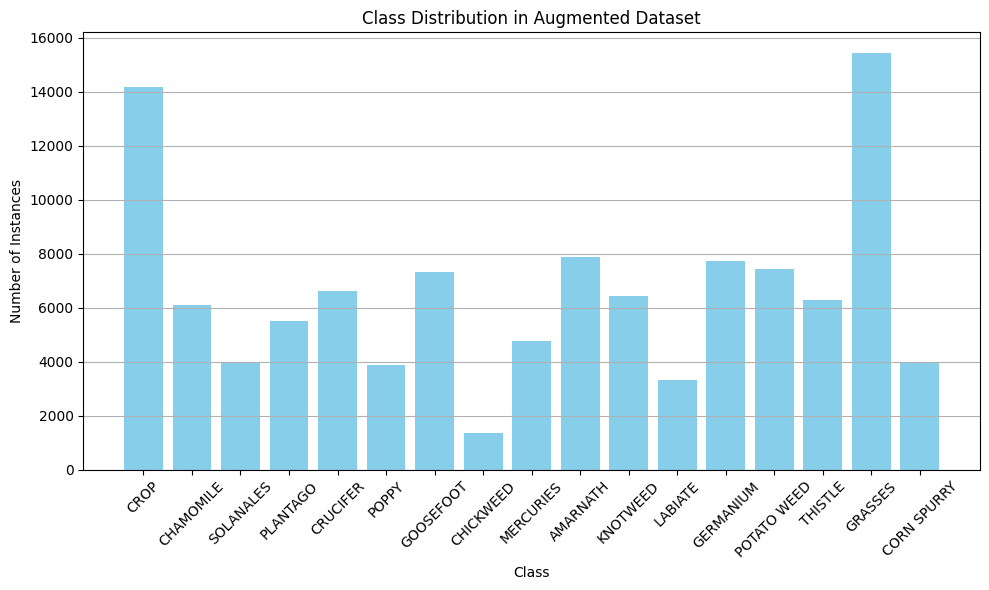

In [50]:
import os
import matplotlib.pyplot as plt

# Path to the augmented dataset
dataset_path = '/kaggle/working/dataset_aug'  # Update this with the correct path

# Initialize a dictionary to store class counts
class_counts = {}

# Iterate over the directories (class folders) in the dataset
for class_dir in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_dir)
    
    # Check if it's a directory and not a file
    if os.path.isdir(class_path):
        # Get all files in the class directory (e.g., images)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        class_name = class_name_map.get(int(class_dir), f"Unknown({class_dir})")
        # Count the number of image files
        class_counts[class_name] = len(image_files)

# Prepare data for the histogram
class_names = list(class_counts.keys())
class_instance_counts = list(class_counts.values())

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_instance_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in Augmented Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis = 'y')
plt.show()


In [ ]:
!zip augmented_version.zip -r /kaggle/working/

updating: kaggle/working/ (stored 0%)
  adding: kaggle/working/dataset_val/ (stored 0%)
  adding: kaggle/working/dataset_val/0/ (stored 0%)
  adding: kaggle/working/dataset_val/0/vwg-0293-0002_patch_7.jpg (deflated 13%)
  adding: kaggle/working/dataset_val/0/vwg-0301-0015_patch_3.jpg (deflated 5%)
  adding: kaggle/working/dataset_val/0/ave-0526-0004_patch_3.jpg (deflated 5%)
  adding: kaggle/working/dataset_val/0/vwg-0021-0013_patch_1.jpg (deflated 4%)
  adding: kaggle/working/dataset_val/0/ave-0540-0072_patch_3.jpg (deflated 14%)
  adding: kaggle/working/dataset_val/0/ave-0081-0015_patch_6.jpg (deflated 1%)
  adding: kaggle/working/dataset_val/0/ave-0079-0021_patch_3.jpg (deflated 1%)
  adding: kaggle/working/dataset_val/0/ave-0543-0020_patch_15.jpg (deflated 16%)
  adding: kaggle/working/dataset_val/0/ave-0527-0007_patch_4.jpg (deflated 3%)
  adding: kaggle/working/dataset_val/0/vwg-1285-0004_patch_3.jpg (deflated 4%)
  adding: kaggle/working/dataset_val/0/ave-0204-0011_patch_1.jpg (

In [ ]:
from IPython.display import FileLink